## Deep Learning Model

C:\Users\bekib\AppData\Local\Temp\ipykernel_54720\2608831112.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/train.csv')
c:\Users\bekib\Desktop\10ACADAMY\WEEK-FOUR\week-4\.week-4\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 6576449.5000 - val_loss: 1950952.0000
Epoch 2/50
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - loss: 1890036.3750 - val_loss: 1855222.3750
Epoch 3/50
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - loss: 1818776.2500 - val_loss: 1823229.8750
Epoch 4/50
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 1791496.5000 - val_loss: 1808348.6250
Epoch 5/50
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - loss: 1777108.7500 - val_loss: 1798318.3750
Epoch 6/50
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - loss: 1766428.2500 - val_loss: 1790402.5000
Epoch 7/50
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 1758881.8750 - val_loss: 1784606.2500
Epoch 8/50
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - loss: 1752140.6250 - val_loss: 1778737.5000
Epoch 9/50
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 1746212.5000 - val_loss: 1773858.3750
Epoch 10/50
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 1741329

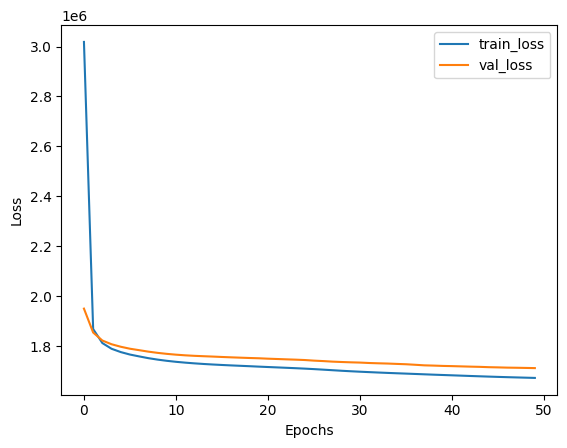

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 1707962.0000
Test Loss: 1712835.875


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv('../data/train.csv')

# Step 2: Handle missing values
df = df.dropna()

# Step 3: Remove 'Unnamed: 0' column if it's not useful
df = df.drop(columns=['Unnamed: 0'])

# Step 4: Convert 'Date' to datetime and extract features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Step 5: Define features (X) and target (y)
X = df.drop(columns=['Sales', 'Date'])
y = df['Sales']

# Step 6: Convert categorical columns to numeric
X = pd.get_dummies(X, columns=['StateHoliday'], drop_first=True)

# Step 7: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Build Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Step 10: Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 11: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Step 12: Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 13: Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


In [13]:
path = pd.read_csv('../data/test.csv')
predicted_sales = model.predict(X_test)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [15]:
results = pd.DataFrame({
    'Sales': predicted_sales.flatten()  # Flatten the predictions to make them 1D
})

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 15: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_sales)
print(f'Mean Squared Error (MSE): {mse}')

# Step 16: Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_sales)
print(f'Mean Absolute Error (MAE): {mae}')

# Step 17: Calculate R-Squared (R²)
r2 = r2_score(y_test, predicted_sales)
print(f'R-Squared (R²): {r2}')


Mean Squared Error (MSE): 1712835.048887533
Mean Absolute Error (MAE): 867.1513275402783
R-Squared (R²): 0.8841802477836609


### Mean Squared Error (MSE): 1712835.048887533
### Mean Absolute Error (MAE): 867.1513275402783
#### R-Squared (R²): 0.8841802477836609

### relatively this LSTM performs much better than the logistic regression

In [18]:
results

,Sales
0,0.329851
1,7233.455566
2,8064.889648
3,3074.256104
4,10558.044922
...,...
203437,6825.839355
203438,8317.991211
203439,4087.643066
203440,-7.748274
